# 肤色检测

In [3]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from scipy.misc import imread, imresize, imsave
from skimage.filters import threshold_otsu

In [4]:
rgb = cv2.cvtColor(cv2.imread('../datas/hands.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)

## 1.基于RGB颜色空间检测

In [5]:
def skin_detect_rgb(rgb):
    dst = np.zeros_like(rgb)
    R,G,B = rgb[:,:,0],rgb[:,:,1],rgb[:,:,2]
    idx1 = (R > 95)
    idx2 = (G > 40)
    idx3 = (B > 20)
    idx4 = (np.abs(R - B) > 15)
    idx5 = (np.abs(R - G) > 15)
    cidx1 = idx1 & idx2 & idx3 & idx4 & idx5
    
    idx6 = (R > 200)
    idx7 = (G > 210)
    idx8 = (B > 170)
    idx9 = (np.abs(R - B) <= 15)
    idx10 = (R > B)
    idx11 = (G > B)
    cidx2 = idx6 & idx7 & idx8 & idx9 & idx10 & idx11
    
    idx = cidx1 | cidx2
    dst[idx] = rgb[idx]
    
    return dst
    

In [6]:
dst = skin_detect_rgb(rgb)

Text(0.5,1,'RGB Detect Result')

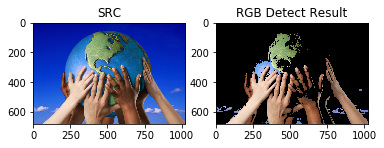

In [7]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('RGB Detect Result')

## 2.基于RG模型

In [8]:
def skin_detect_rg(rgb):
    src = rgb.astype('float32') / 255.0
    dst = np.zeros_like(src)
    R,G,B = src[:,:,0],src[:,:,1],src[:,:,2]
    Aup=-1.8423;  
    Bup=1.5294;  
    Cup=0.0422;  
    Adown=-0.7279;  
    Bdown=0.6066;  
    Cdown=0.1766;
    eps = 1.0e-5
    s = R + G + B
    r = R / (s+eps)
    g = G / (s + eps)
    Gup=Aup*r*r+Bup*r+Cup
    Gdown=Adown*r*r+Bdown*r+Cdown
    Wr=(r-0.33)*(r-0.33)+(g-0.33)*(g-0.33)
    
    idx = (g <= Gup) & (g > Gdown) & (Wr > 0.004)
    dst[idx] = src[idx]
    dst[~idx] = 0
    return (dst*255).astype('uint8')

In [9]:
dst = skin_detect_rg(rgb)

Text(0.5,1,'RG Detect Result')

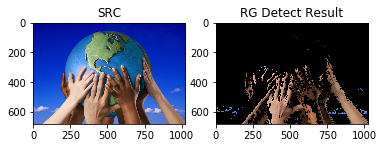

In [10]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('RG Detect Result')

## 3.基于CR+OTSU

In [19]:
def skin_detect_cr_otsu(rgb):
    ycrbr =  cv2.cvtColor(rgb,cv2.COLOR_RGB2YCrCb)
    channels = cv2.split(ycrbr)
    cr = channels[1]
    # 计算 OTSU
    thresh = threshold_otsu(cr)
    idx = gray < int(thresh)
    dst = np.zeros_like(rgb)
    dst[idx] = rgb[idx]
    return dst

In [20]:
dst = skin_detect_cr_otsu(rgb)

Text(0.5,1,'CR+OTSU Detect Result')

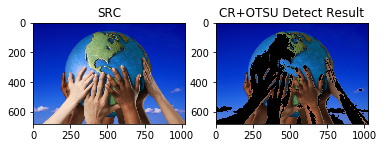

In [21]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('CR+OTSU Detect Result')